<a href="https://colab.research.google.com/github/EmanoelSantosDados/EmanoelSantosDados/blob/main/PremierLeague2020_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EM CONSTRUÇÃO**
# **Análise exploratória de dados da Premier League**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('/content/premier ligue.csv')

In [37]:
df.shape

(4788, 28)

In [38]:
df.sample(4)

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
4463,70,2019-12-21,12:30 (14:30),Premier League,Matchweek 18,Sat,Home,D,0,0,...,Match Report,NaN,9,0,19.7,1,0,0,2020,Everton
1380,17,2023-11-25,15:00 (17:00),Premier League,Matchweek 13,Sat,Away,W,3,2,...,Match Report,NaN,9,4,19.9,1,1,1,2024,Brighton and Hove Albion
1765,149,2023-01-14,12:30 (14:30),Premier League,Matchweek 20,Sat,Away,L,1,2,...,Match Report,NaN,5,1,19.2,0,0,0,2023,Manchester City
834,59,2020-07-21,18:00 (19:00),Premier League,Matchweek 37,Tue,Away,W,4,0,...,Match Report,NaN,25,9,17.4,1,0,1,2023,Manchester City


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4788 entries, 0 to 4787
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4788 non-null   int64  
 1   date          4788 non-null   object 
 2   time          4788 non-null   object 
 3   comp          4788 non-null   object 
 4   round         4788 non-null   object 
 5   day           4788 non-null   object 
 6   venue         4788 non-null   object 
 7   result        4788 non-null   object 
 8   gf            4788 non-null   int64  
 9   ga            4788 non-null   int64  
 10  opponent      4788 non-null   object 
 11  xg            4788 non-null   float64
 12  xga           4788 non-null   float64
 13  poss          4788 non-null   int64  
 14  attendance    3155 non-null   float64
 15  captain       4788 non-null   object 
 16  formation     4788 non-null   object 
 17  referee       4788 non-null   object 
 18  match report  4788 non-null 

In [40]:
df.columns

Index(['Unnamed: 0', 'date', 'time', 'comp', 'round', 'day', 'venue', 'result',
       'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain',
       'formation', 'referee', 'match report', 'notes', 'sh', 'sot', 'dist',
       'fk', 'pk', 'pkatt', 'season', 'team'],
      dtype='object')

In [42]:
df.drop(columns=['Unnamed: 0', 'time', 'comp', 'xg', 'attendance', 'xga', 'captain', 'match report',
              'notes', 'sot', 'dist', 'fk', 'pk', 'pkatt'], axis=1, inplace=True)

In [43]:
df.describe()

,gf,ga,poss,sh,season
count,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000
mean,1.447995,1.405388,50.432957,12.619256,2022.365079
std,1.312635,1.286927,12.810958,5.548444,1.461850
min,0.000000,0.000000,18.000000,0.000000,2020.000000
25%,0.000000,0.000000,41.000000,9.000000,2021.000000
50%,1.000000,1.000000,51.000000,12.000000,2023.000000
75%,2.000000,2.000000,60.000000,16.000000,2024.000000
max,9.000000,9.000000,82.000000,36.000000,2024.000000


In [44]:
df.dtypes

,0
date,object
round,object
day,object
venue,object
result,object
gf,int64
ga,int64
opponent,object
poss,int64
formation,object


In [64]:

df["date"] = pd.to_datetime(df["date"], format='%Y-%m-%d', errors='coerce') # converting to datetime for operations

# converting this columns to category to save memory and faster operations
df["venue"]=df["venue"].astype("category")
df["day"]=df["day"].astype("category")
df["result"]=df["result"].astype("category")
df["opponent"]=df["opponent"].astype("category")
df["team"]=df["team"].astype("category")
df["round"]=df["round"].astype("category")
df["referee"]=df["referee"].astype("category")
df["formation"]=df["formation"].astype("category")
df["season"]=df["season"].astype("category")

# converting data to lower bits
df["gf"]=df["gf"].astype(np.int8)
df["sh"]=df["sh"].astype(np.int8)

df.head()

,date,round,day,venue,result,gf,ga,opponent,poss,formation,referee,sh,season,team
0,2020-09-21,Matchweek 2,Mon,Away,W,3,1,Wolves,65,4-2-3-1,Andre Marriner,13,2024,Manchester City
1,2020-09-27,Matchweek 3,Sun,Home,L,2,5,Leicester City,72,4-2-3-1,Michael Oliver,16,2024,Manchester City
2,2020-10-03,Matchweek 4,Sat,Away,D,1,1,Leeds United,49,4-3-3,Mike Dean,23,2024,Manchester City
3,2020-10-17,Matchweek 5,Sat,Home,W,1,0,Arsenal,58,3-1-4-2,Chris Kavanagh,13,2024,Manchester City
4,2020-10-24,Matchweek 6,Sat,Away,D,1,1,West Ham,69,4-3-3,Anthony Taylor,14,2024,Manchester City


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4788 entries, 0 to 4787
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       4788 non-null   datetime64[ns]
 1   round      4788 non-null   category      
 2   day        4788 non-null   category      
 3   venue      4788 non-null   category      
 4   result     4788 non-null   category      
 5   gf         4788 non-null   int8          
 6   ga         4788 non-null   int8          
 7   opponent   4788 non-null   category      
 8   poss       4788 non-null   int8          
 9   formation  4788 non-null   category      
 10  referee    4788 non-null   category      
 11  sh         4788 non-null   int8          
 12  season     4788 non-null   category      
 13  team       4788 non-null   category      
dtypes: category(9), datetime64[ns](1), int8(4)
memory usage: 105.0 KB


In [66]:
premier = df.copy()

In [67]:
premier.columns

Index(['date', 'round', 'day', 'venue', 'result', 'gf', 'ga', 'opponent',
       'poss', 'formation', 'referee', 'sh', 'season', 'team'],
      dtype='object')

In [68]:
premier['round'] = premier['round'].str.replace('Matchweek', '')
premier

,date,round,day,venue,result,gf,ga,opponent,poss,formation,referee,sh,season,team
0,2020-09-21,2,Mon,Away,W,3,1,Wolves,65,4-2-3-1,Andre Marriner,13,2024,Manchester City
1,2020-09-27,3,Sun,Home,L,2,5,Leicester City,72,4-2-3-1,Michael Oliver,16,2024,Manchester City
2,2020-10-03,4,Sat,Away,D,1,1,Leeds United,49,4-3-3,Mike Dean,23,2024,Manchester City
3,2020-10-17,5,Sat,Home,W,1,0,Arsenal,58,3-1-4-2,Chris Kavanagh,13,2024,Manchester City
4,2020-10-24,6,Sat,Away,D,1,1,West Ham,69,4-3-3,Anthony Taylor,14,2024,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,2020-07-07,34,Tue,Away,L,1,2,Watford,56,4-2-3-1,Anthony Taylor,12,2020,Norwich City
4784,2020-07-11,35,Sat,Home,L,0,4,West Ham,53,4-2-3-1,Kevin Friend,11,2020,Norwich City
4785,2020-07-14,36,Tue,Away,L,0,1,Chelsea,33,4-1-4-1,Jonathan Moss,2,2020,Norwich City
4786,2020-07-18,37,Sat,Home,L,0,2,Burnley,42,4-2-3-1,Kevin Friend,6,2020,Norwich City


**Traduzindo para português**

In [69]:
#Traduzindo colunas português
premier_col = {'date': 'data',
               'day': 'dia',
               'round': 'rodada',
               'venue': 'local',
               'referee': 'arbitro',
               'formation': 'formação_mand',
               'team': 'time',
               'opponent': 'visitante',
               'result': 'resultado',
               'gf': 'gols_mand',
               'ga': 'gols_visit',
               'sh': 'chutes_mand',
               'poss': 'posse_mand',
               'poss.1': 'posse_visit',
               'season': 'temporada',

}

#Traduzindo linhas português
premier_lin = {'Mon': 'Segunda',
               'Tue': 'Terça',
               'Wed': 'Quarta',
               'Thu': 'Quinta',
               'Fri': 'Sexta',
               'Sat': 'Sábado',
               'Sun': 'Domingo',
               'W': 'Vitória',
               'D': 'Empate',
               'L': 'Derrota',
               'Home': 'Mandante',
               'Away': 'Visitante',
}

In [70]:
premier.rename(columns=premier_col, inplace=True)
premier.replace(premier_lin, inplace=True)

premier.copy()

,data,rodada,dia,local,resultado,gols_mand,gols_visit,visitante,posse_mand,formação_mand,arbitro,chutes_mand,temporada,time
0,2020-09-21,2,Segunda,Visitante,Vitória,3,1,Wolves,65,4-2-3-1,Andre Marriner,13,2024,Manchester City
1,2020-09-27,3,Domingo,Mandante,Derrota,2,5,Leicester City,72,4-2-3-1,Michael Oliver,16,2024,Manchester City
2,2020-10-03,4,Sábado,Visitante,Empate,1,1,Leeds United,49,4-3-3,Mike Dean,23,2024,Manchester City
3,2020-10-17,5,Sábado,Mandante,Vitória,1,0,Arsenal,58,3-1-4-2,Chris Kavanagh,13,2024,Manchester City
4,2020-10-24,6,Sábado,Visitante,Empate,1,1,West Ham,69,4-3-3,Anthony Taylor,14,2024,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,2020-07-07,34,Terça,Visitante,Derrota,1,2,Watford,56,4-2-3-1,Anthony Taylor,12,2020,Norwich City
4784,2020-07-11,35,Sábado,Mandante,Derrota,0,4,West Ham,53,4-2-3-1,Kevin Friend,11,2020,Norwich City
4785,2020-07-14,36,Terça,Visitante,Derrota,0,1,Chelsea,33,4-1-4-1,Jonathan Moss,2,2020,Norwich City
4786,2020-07-18,37,Sábado,Mandante,Derrota,0,2,Burnley,42,4-2-3-1,Kevin Friend,6,2020,Norwich City


In [71]:
#Criando a coluna placar
premier['placar'] = premier['gols_mand'].astype(str) + '-' + premier['gols_visit'].astype(str)
premier

,data,rodada,dia,local,resultado,gols_mand,gols_visit,visitante,posse_mand,formação_mand,arbitro,chutes_mand,temporada,time,placar
0,2020-09-21,2,Segunda,Visitante,Vitória,3,1,Wolves,65,4-2-3-1,Andre Marriner,13,2024,Manchester City,3-1
1,2020-09-27,3,Domingo,Mandante,Derrota,2,5,Leicester City,72,4-2-3-1,Michael Oliver,16,2024,Manchester City,2-5
2,2020-10-03,4,Sábado,Visitante,Empate,1,1,Leeds United,49,4-3-3,Mike Dean,23,2024,Manchester City,1-1
3,2020-10-17,5,Sábado,Mandante,Vitória,1,0,Arsenal,58,3-1-4-2,Chris Kavanagh,13,2024,Manchester City,1-0
4,2020-10-24,6,Sábado,Visitante,Empate,1,1,West Ham,69,4-3-3,Anthony Taylor,14,2024,Manchester City,1-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,2020-07-07,34,Terça,Visitante,Derrota,1,2,Watford,56,4-2-3-1,Anthony Taylor,12,2020,Norwich City,1-2
4784,2020-07-11,35,Sábado,Mandante,Derrota,0,4,West Ham,53,4-2-3-1,Kevin Friend,11,2020,Norwich City,0-4
4785,2020-07-14,36,Terça,Visitante,Derrota,0,1,Chelsea,33,4-1-4-1,Jonathan Moss,2,2020,Norwich City,0-1
4786,2020-07-18,37,Sábado,Mandante,Derrota,0,2,Burnley,42,4-2-3-1,Kevin Friend,6,2020,Norwich City,0-2


In [72]:
#Criando a coluna posse_vist
premier['posse_visit'] = 100 - premier['posse_mand']
premier

,data,rodada,dia,local,resultado,gols_mand,gols_visit,visitante,posse_mand,formação_mand,arbitro,chutes_mand,temporada,time,placar,posse_visit
0,2020-09-21,2,Segunda,Visitante,Vitória,3,1,Wolves,65,4-2-3-1,Andre Marriner,13,2024,Manchester City,3-1,35
1,2020-09-27,3,Domingo,Mandante,Derrota,2,5,Leicester City,72,4-2-3-1,Michael Oliver,16,2024,Manchester City,2-5,28
2,2020-10-03,4,Sábado,Visitante,Empate,1,1,Leeds United,49,4-3-3,Mike Dean,23,2024,Manchester City,1-1,51
3,2020-10-17,5,Sábado,Mandante,Vitória,1,0,Arsenal,58,3-1-4-2,Chris Kavanagh,13,2024,Manchester City,1-0,42
4,2020-10-24,6,Sábado,Visitante,Empate,1,1,West Ham,69,4-3-3,Anthony Taylor,14,2024,Manchester City,1-1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,2020-07-07,34,Terça,Visitante,Derrota,1,2,Watford,56,4-2-3-1,Anthony Taylor,12,2020,Norwich City,1-2,44
4784,2020-07-11,35,Sábado,Mandante,Derrota,0,4,West Ham,53,4-2-3-1,Kevin Friend,11,2020,Norwich City,0-4,47
4785,2020-07-14,36,Terça,Visitante,Derrota,0,1,Chelsea,33,4-1-4-1,Jonathan Moss,2,2020,Norwich City,0-1,67
4786,2020-07-18,37,Sábado,Mandante,Derrota,0,2,Burnley,42,4-2-3-1,Kevin Friend,6,2020,Norwich City,0-2,58


In [73]:
#Ordenando as colunas
premier = premier[['data', 'dia', 'rodada', 'local', 'arbitro', 'formação_mand', 'time',
                   'visitante', 'resultado', 'placar', 'gols_mand', 'gols_visit', 'posse_mand',
                   'posse_visit', 'chutes_mand', 'temporada']
]
premier.head()

,data,dia,rodada,local,arbitro,formação_mand,time,visitante,resultado,placar,gols_mand,gols_visit,posse_mand,posse_visit,chutes_mand,temporada
0,2020-09-21,Segunda,2,Visitante,Andre Marriner,4-2-3-1,Manchester City,Wolves,Vitória,3-1,3,1,65,35,13,2024
1,2020-09-27,Domingo,3,Mandante,Michael Oliver,4-2-3-1,Manchester City,Leicester City,Derrota,2-5,2,5,72,28,16,2024
2,2020-10-03,Sábado,4,Visitante,Mike Dean,4-3-3,Manchester City,Leeds United,Empate,1-1,1,1,49,51,23,2024
3,2020-10-17,Sábado,5,Mandante,Chris Kavanagh,3-1-4-2,Manchester City,Arsenal,Vitória,1-0,1,0,58,42,13,2024
4,2020-10-24,Sábado,6,Visitante,Anthony Taylor,4-3-3,Manchester City,West Ham,Empate,1-1,1,1,69,31,14,2024


<Axes: xlabel='resultado', ylabel='count'>

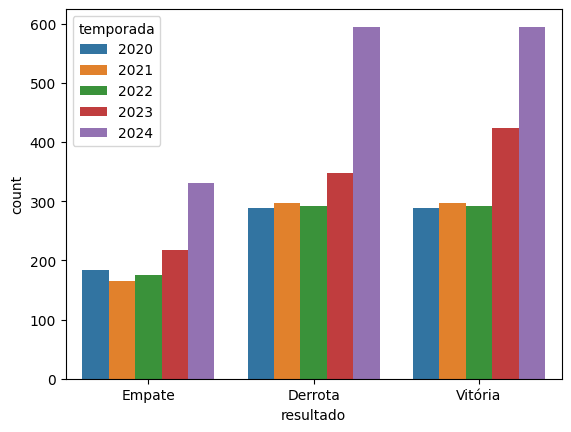

In [74]:
sns.countplot(data=premier, x="resultado",hue="temporada")

<Axes: xlabel='resultado', ylabel='count'>

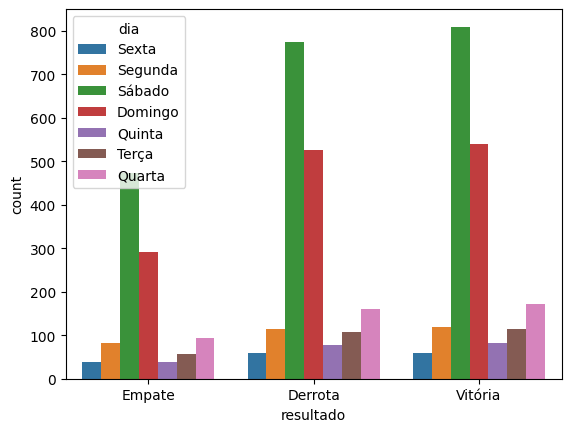

In [75]:
sns.countplot(data=premier, x="resultado", hue="dia")

<ipython-input-76-686ed626b521>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vitoria = premier.groupby("dia")["data"].count().reset_index(name='count')
<ipython-input-76-686ed626b521>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vitoria, x='dia', y='count', palette='viridis')


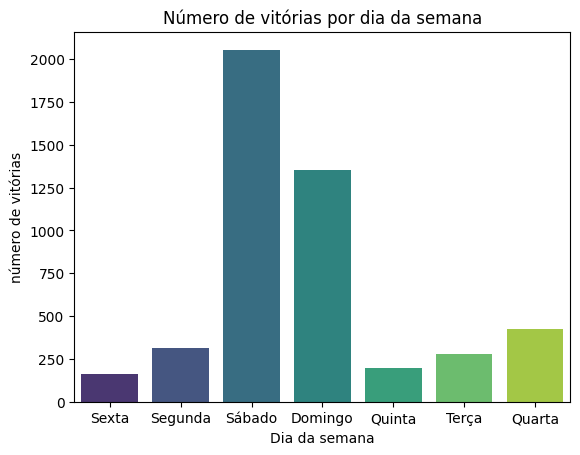

In [76]:
vitoria = premier.groupby("dia")["data"].count().reset_index(name='count')
sns.barplot(data=vitoria, x='dia', y='count', palette='viridis')
plt.xlabel('Dia da semana')
plt.ylabel('número de vitórias')
plt.title('Número de vitórias por dia da semana')

plt.show()

In [ ]:
#Empates por semana

<ipython-input-77-047b97d9228d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vitoria = premier[premier["resultado"]=="Vitória"].groupby("time")["resultado"].count().sort_values(ascending=False)


<Axes: xlabel='time'>

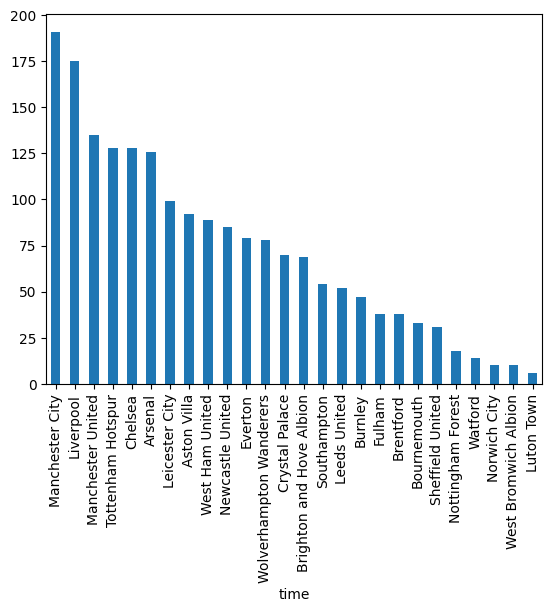

In [77]:
vitoria = premier[premier["resultado"]=="Vitória"].groupby("time")["resultado"].count().sort_values(ascending=False)
vitoria.plot(kind="bar")

<Axes: xlabel='temporada', ylabel='time'>

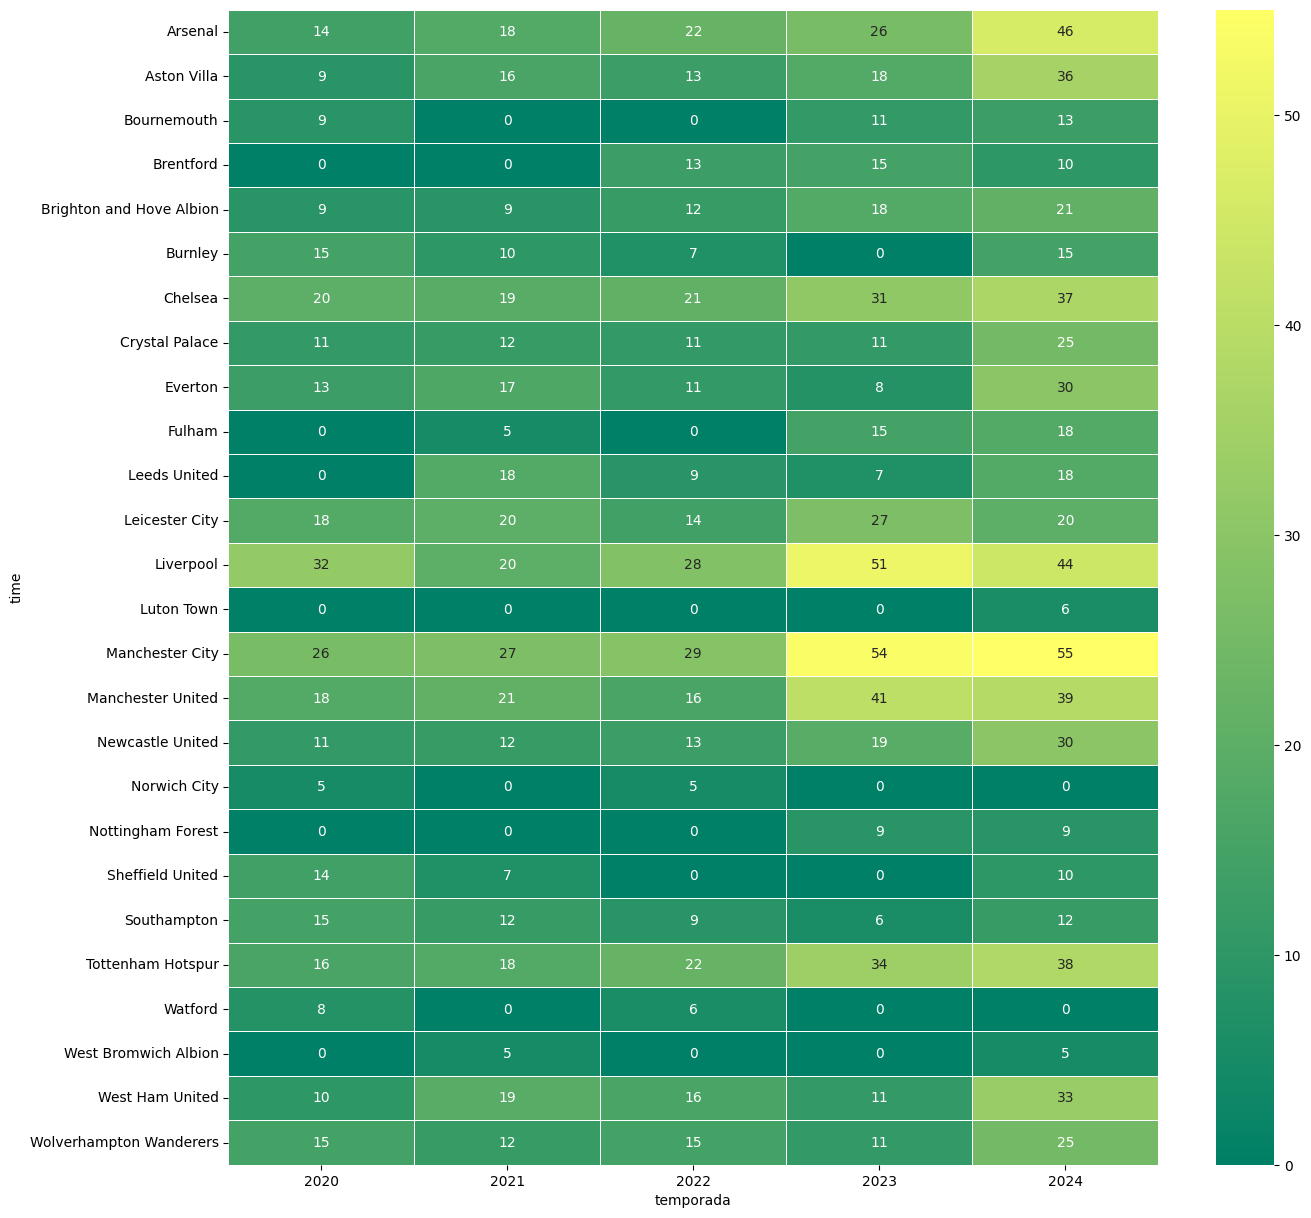

In [78]:
premier2 = premier.copy()
premier2['Vitória'] = premier2['resultado'].apply(lambda x: 1 if x == 'Vitória' else 0)

temp_premier = premier2.pivot_table(index='time', columns='temporada', values='Vitória', aggfunc='sum')

plt.figure(figsize=(15, 15))
sns.heatmap(temp_premier, annot=True, linewidth=0.5, cmap='summer')